## Lista de Exercícios da Disciplina de Métodos Computacios em Engenharia – Primeira Unidade

### Hudson Artur de Lima Andrade – Engenharia Elétrica

1. (Valor: 1.5 pontos) - Ajuste os valores da tabela a uma equação do tipo y = ax^b. 
Saída do programa: Valores de a, b, e diagrama de dispersão com a curva de ajuste.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x   =    np.array([1.0,   2.0,  3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

y   =    np.array([100.0, 25.0, 11.1, 6.3, 4.0, 2.8, 2.0, 1.6, 1.2, 1.0])

n   =    10

ln_x = np.log(x)
ln_y = np.log(y)

<img src="a_&_b_questao_01.jpg">

In [3]:
multiplicacao_de_lnx_lny = np.multiply(ln_x,ln_y)

In [4]:
soma_da_multiplicacao_lnx_lny = np.sum(multiplicacao_de_lnx_lny)

In [5]:
soma_de_lny = np.sum(ln_y)

In [6]:
soma_de_lnx = np.sum(ln_x)

In [7]:
multiplicacao_da_soma_de_lnx_lny = (soma_de_lnx*soma_de_lny)

In [8]:
lnx_ao_quadrado = np.power(ln_x,2)

In [9]:
soma_do_quadrado_de_lnx = np.sum(lnx_ao_quadrado)

In [10]:
quadrado_da_soma_de_lnx = np.power(soma_de_lnx,2)

In [11]:
b1 = (n*(soma_da_multiplicacao_lnx_lny) - (multiplicacao_da_soma_de_lnx_lny))/((n*soma_do_quadrado_de_lnx)-(quadrado_da_soma_de_lnx))

In [25]:
print('Valor de b1:', b1)

Valor de b1: -2.002717752572164


In [28]:
print('Valor de soma_de_lny * n:', soma_de_lny*n)

Valor de soma_de_lny * n: 158.32926897472754


In [29]:
print('Valor de soma_de_lnx * b1:', soma_de_lnx * b1)

Valor de soma_de_lnx * b1: -30.249875202272527


In [30]:
print('Valor de soma_de_lnx:', soma_de_lnx)

Valor de soma_de_lnx: 15.104412573075514


In [26]:
b0 = ((n*soma_de_lny) - (soma_de_lnx*b1))/n

In [27]:
print('Valor de b0:', b0)

Valor de b0: 18.85791441770001


In [15]:
z = np.polyfit(ln_x, y, 1)
p = np.poly1d(z)

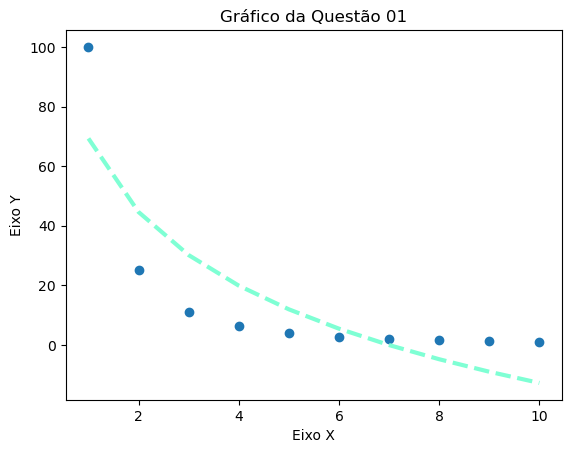

In [16]:
plt.scatter(x, y)
plt.plot(x, p(ln_x), color="aquamarine", linewidth=3, linestyle="--", label="Linha de Tendência")
plt.title('Gráfico da Questão 01')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

In [31]:
print('Valor de a:', b1)
print('Valor de b:', b0)

Valor de a: -2.002717752572164
Valor de b: 18.85791441770001


2. Ajuste o índice de refração, no intervalo [0.5, 1.1], com incrementos em λ iguais a 0.1, pela equação dada. Saída do programa: Valores de a, b, curvas de n(λ) exata e ajustada e valor do erro relativo em λ = 0.98.
